In [34]:
import mne
import numpy as np
from scipy import stats
import seaborn as sns
import pandas as pd
import os
import re

# Data Preparation

In [71]:
# Common funtions 
def get_pearson_matrix(raw, channels=None): 
    if (channels != None):
      ch = channels
    else:
      ch = raw.ch_names[:20]
    pearson = {} 

    for c in ch: 
        pearson[c] = {} 
        pearson[c][c] = 1
        
    _ch = ch.copy()
    while(len(_ch) > 0):
        chl1 = _ch.pop(0) 
        for chl2 in _ch:
            raw1, _ = raw[chl1]
            raw2, _ = raw[chl2]

            pearson_c = stats.pearsonr(raw1.flatten(), raw2.flatten())

            pearson[chl1][chl2] = pearson_c[0]
            pearson[chl2][chl1] = pearson_c[0]
    return pearson 


def get_eeg_file(unique_id): 
  rootdir = "./edf"
  sub,  taks = unique_id.split('_')
  regex = re.compile('(.*{}.*{}.*edf$)'.format(sub, taks))

  for root, dirs, files in os.walk(rootdir):
    for file in files:
      if regex.match(file):
        return file

In [28]:
get_eeg_file("9003_RSEC")

'INSPEC.INIT.900301000.010217.104300.Signals.Raw_RSEC_01.edited.18.134.318.132.edf'

In [9]:
df = pd.read_excel("Demographic_List.xlsx")

df.head(10)

,sub,Age,Gender,Study,count,session,Condition,task,Headset
0,9003,41,F,INSPECDS,286,900301000,HC,RSEC,X24
1,9003,41,F,INSPECDS,296,900301000,HC,RSEO,X24
2,9004,66,F,INSPECDS,266,900401000,HC,RSEC,X24
3,9004,66,F,INSPECDS,285,900401000,HC,RSEO,X24
4,9006,52,M,INSPECDS,288,900601000,HC,RSEC,X24
5,9006,52,M,INSPECDS,291,900601000,HC,RSEO,X24
6,9008,53,F,INSPECDS,291,900801000,HC,RSEC,X24
7,9008,53,F,INSPECDS,290,900801000,HC,RSEO,X24
8,9009,48,F,INSPECDS,292,900901000,HC,RSEC,X24
9,9009,48,F,INSPECDS,279,900901000,HC,RSEO,X24


In [10]:
conditions = set(df["Condition"])
conditions

{'AD', 'HC', 'MCI'}

In [11]:
df["unique_id"] = df["sub"].astype(str) + "_" + df["task"]
df

,sub,Age,Gender,Study,count,session,Condition,task,Headset,unique_id
0,9003,41,F,INSPECDS,286,900301000,HC,RSEC,X24,9003_RSEC
1,9003,41,F,INSPECDS,296,900301000,HC,RSEO,X24,9003_RSEO
2,9004,66,F,INSPECDS,266,900401000,HC,RSEC,X24,9004_RSEC
3,9004,66,F,INSPECDS,285,900401000,HC,RSEO,X24,9004_RSEO
4,9006,52,M,INSPECDS,288,900601000,HC,RSEC,X24,9006_RSEC
...,...,...,...,...,...,...,...,...,...,...
378,9807,59,F,INSPECDS,292,980701000,MCI,RSEO,X24,9807_RSEO
379,9809,77,M,INSPECDS,288,980901000,MCI,RSEC,X24,9809_RSEC
380,9809,77,M,INSPECDS,284,980901000,MCI,RSEO,X24,9809_RSEO
381,9812,75,M,INSPECDS,290,981211000,MCI,RSEC,X24,9812_RSEC


In [23]:
df["filename"] = df["unique_id"].apply(get_eeg_file)
df

,sub,Age,Gender,Study,count,session,Condition,task,Headset,unique_id,filename
0,9003,41,F,INSPECDS,286,900301000,HC,RSEC,X24,9003_RSEC,INSPEC.INIT.900301000.010217.104300.Signals.Ra...
1,9003,41,F,INSPECDS,296,900301000,HC,RSEO,X24,9003_RSEO,INSPEC.INIT.900301000.010217.104300.Signals.Ra...
2,9004,66,F,INSPECDS,266,900401000,HC,RSEC,X24,9004_RSEC,INSPEC.INIT.900401000.070217.105622.Signals.Ra...
3,9004,66,F,INSPECDS,285,900401000,HC,RSEO,X24,9004_RSEO,INSPEC.INIT.900401000.070217.105622.Signals.Ra...
4,9006,52,M,INSPECDS,288,900601000,HC,RSEC,X24,9006_RSEC,INSPEC.INIT.900601000.130217.115256.Signals.Ra...
...,...,...,...,...,...,...,...,...,...,...,...
378,9807,59,F,INSPECDS,292,980701000,MCI,RSEO,X24,9807_RSEO,INSPEC.INIT.980701000.070619.062930.Signals.Ra...
379,9809,77,M,INSPECDS,288,980901000,MCI,RSEC,X24,9809_RSEC,INSPEC.INIT.980901000.170719.150050.Signals.Ra...
380,9809,77,M,INSPECDS,284,980901000,MCI,RSEO,X24,9809_RSEO,INSPEC.INIT.980901000.170719.150050.Signals.Ra...
381,9812,75,M,INSPECDS,290,981211000,MCI,RSEC,X24,9812_RSEC,INSPEC.INIT.981211000.290819.083316.Signals.Ra...


In [32]:
df_AD = df[df["Condition"] == "AD"]
df_AD.head(5)

,sub,Age,Gender,Study,count,session,Condition,task,Headset,unique_id,filename
200,9202,83,F,INSPECDS,286,920201000,AD,RSEC,X24,9202_RSEC,INSPEC.INIT.920201000.140317.103730.Signals.Ra...
201,9202,83,F,INSPECDS,283,920201000,AD,RSEO,X24,9202_RSEO,INSPEC.INIT.920201000.140317.103730.Signals.Ra...
206,9205,90,M,INSPECDS,259,920501000,AD,RSEC,X24,9205_RSEC,INSPEC.INIT.920501000.280317.110637.Signals.Ra...
207,9205,90,M,INSPECDS,240,920501000,AD,RSEO,X24,9205_RSEO,INSPEC.INIT.920501000.280317.110637.Signals.Ra...
208,9206,59,F,INSPECDS,287,920601000,AD,RSEC,X24,9206_RSEC,INSPEC.INIT.920601000.050417.122248.Signals.Ra...


In [61]:
def get_raw_eeg(filename, root_dir = "./edf/"):
    raw = mne.io.read_raw_edf(root_dir + filename)
    return raw

In [ ]:
# Read EEG raw files and save them in a dict for later use 
raw_files = {} 
for _, s in df.iterrows(): 
    raw_files[s["unique_id"]] = get_raw_eeg(s["filename"])

In [82]:
matrix = df_AD.head(5).apply(lambda x: get_pearson_matrix( raw_files[x["unique_id"]]), axis=1)

<AxesSubplot:>

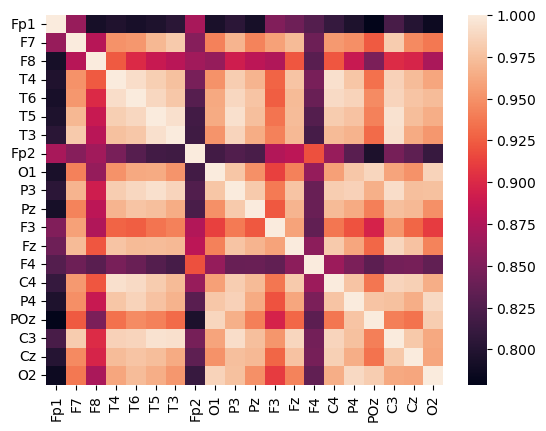

In [90]:
sns.heatmap(pd.DataFrame(matrix.get(200)))

<AxesSubplot:>

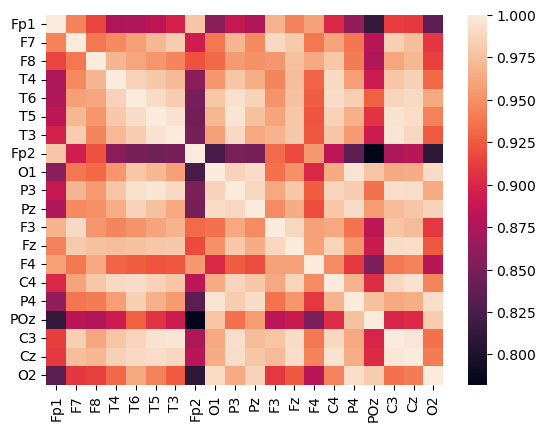

In [91]:
sns.heatmap(pd.DataFrame(matrix.get(201)))

<AxesSubplot:>

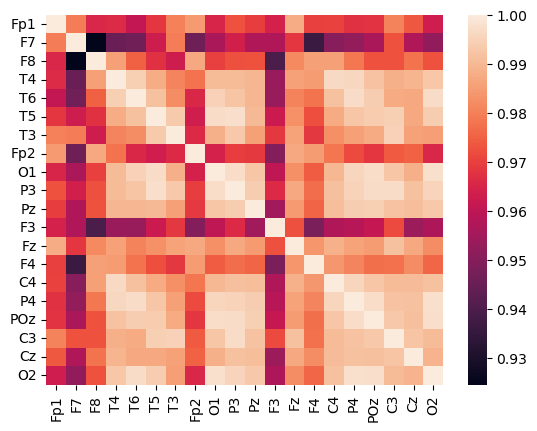

In [95]:
sns.heatmap(pd.DataFrame(matrix.get(206)))